In [1]:
!pip install --upgrade pixiedust
!pip install --user pandas_profiling

Requirement already up-to-date: pixiedust in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: astunparse in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust)
Requirement not upgraded as not directly required: lxml in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust)
Requirement not upgraded as not directly required: mpld3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust)
Requirement not upgraded as not directly required: colour in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust)
Requirement not upgraded as not directly required: geojson in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust)
Requirement not upgraded as not directly required: markdown in /opt/conda/envs/DSX-P

In [2]:
import os
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
import sklearn.feature_selection
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn import metrics
import pixiedust

Pixiedust database opened successfully


In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e75d1af53f93419e9d7b0bf503bdda26 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='IpFhTvoTSF33WDgErR1hUUqzAvlaIpBbLp6vwrSR0VFG',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e75d1af53f93419e9d7b0bf503bdda26.get_object(Bucket='customerchurndemo-donotdelete-pr-ngul3iw0s6usue',Key='WA_Fn-UseC_-Telco-Customer-Churn.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

customer_data = pd.read_csv(body)
customer_data



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
customer_data.index

RangeIndex(start=0, stop=7043, step=1)

In [5]:
#see customer data columns
customer_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#customer_data['gender'].unique()
#customer_data['Partner'].unique()
#customer_data['Dependents'].unique()
#customer_data['PhoneService'].unique()
#customer_data['InternetService'].unique()
#customer_data['OnlineSecurity'].unique()
#customer_data['PhoneService'].unique()
#customer_data['MultipleLines'].unique()
#customer_data['OnlineBackup'].unique()
#customer_data['DeviceProtection'].unique()
#customer_data['TechSupport'].unique()
#customer_data['StreamingTV'].unique()
#customer_data['StreamingMovies'].unique()
#customer_data['PaperlessBilling'].unique()
#customer_data['Contract'].unique()
#customer_data['PaymentMethod'].unique()
#customer_data['Churn'].unique()
customer_data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

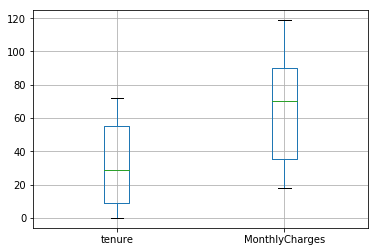

In [9]:
#see info of numeric variables - boxplot
import matplotlib.pyplot as plt
boxplot = customer_data.boxplot(column=['tenure','MonthlyCharges'])

In [10]:
# Drop customerID column
customer_data = customer_data.drop('customerID', axis=1)
customer_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Convert TotalCharges column to numeric as it is detected as object
new_col = pd.to_numeric(customer_data['TotalCharges'], errors='coerce')
new_col

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
         ...   
7013    3756.40
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019     826.00
7020     239.00
7021     727.80
7022    7544.30
7023    6479.40
7024    3626.35
7025    1679.40
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031    3316.10
7032      75.75
7033    2625.25
7034    6886.25
7035    1495.10
7036     743.30
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Leng

In [12]:
# Modify our dataframe to reflect the new datatype
customer_data['TotalCharges'] = pd.Series(new_col)
customer_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [13]:
# Check if we have any NaN values
customer_data.isnull().values.any()

True

In [14]:
# Handle missing values
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values="NaN", strategy="mean")

customer_data['TotalCharges'] = imp.fit_transform(customer_data['TotalCharges'].values.reshape(-1, 1))
customer_data['TotalCharges'] = pd.Series(customer_data['TotalCharges'])

In [15]:
#checking if have null values again
customer_data.isnull().values.any()

False

In [16]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [17]:
# Describe columns with numerical values
pd.set_option('precision', 3)
customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762,2283.300
std,0.369,24.559,30.090,2265.000
min,0.000,0.000,18.250,18.800
25%,0.000,9.000,35.500,402.225
50%,0.000,29.000,70.350,1400.550
75%,0.000,55.000,89.850,3786.600
max,1.000,72.000,118.750,8684.800


In [18]:
# Describe columns with objects
customer_data.describe(exclude=np.number)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [19]:
# Find correlations
customer_data.corr(method='pearson')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000,0.017,0.220,0.102
tenure,0.017,1.000,0.248,0.825
MonthlyCharges,0.220,0.248,1.000,0.650
TotalCharges,0.102,0.825,0.650,1.000


In [20]:
#High Correlation, I excluded  tenure
customer_data = customer_data.drop('tenure', axis=1)
customer_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Use pandas get_dummies
customer_data_encoded = pd.get_dummies(customer_data)
customer_data_encoded.head(10)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,1,0,1,0,0,0,0,1,1,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
5,0,99.65,820.50,1,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
6,0,89.10,1949.40,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
7,0,29.75,301.90,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,1,1,0
8,0,104.80,3046.05,1,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
9,0,56.15,3487.95,0,1,1,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0


In [24]:
customer_data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
5       Yes
6        No
7        No
8       Yes
9        No
10       No
11       No
12       No
13      Yes
14       No
15       No
16       No
17       No
18      Yes
19       No
20      Yes
21       No
22      Yes
23       No
24       No
25       No
26      Yes
27      Yes
28       No
29      Yes
       ... 
7013     No
7014     No
7015     No
7016     No
7017     No
7018    Yes
7019     No
7020     No
7021    Yes
7022     No
7023     No
7024     No
7025     No
7026    Yes
7027     No
7028     No
7029     No
7030     No
7031     No
7032    Yes
7033     No
7034    Yes
7035     No
7036     No
7037     No
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [25]:
y_unenc = customer_data['Churn']
# Convert strings of 'yes' and 'no' to binary values of 0 or 1
le = preprocessing.LabelEncoder()
le.fit(y_unenc)

y_le = le.transform(y_unenc)
pd.DataFrame(y_le)

,0
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [26]:
#Create training data for non-preprocessed approach
X_npp = customer_data.iloc[:, :-1].apply(LabelEncoder().fit_transform)
pd.DataFrame(X_npp).head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,498,3624
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,436,536
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,266,3570
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,729,674


In [27]:
#Create training data for preprocessed approach
X = customer_data_encoded.iloc[:, :-2]
X.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [28]:
#Split non-preprocessed data
X_train_npp, X_test_npp, y_train_npp, y_test_npp = train_test_split(X_npp, y_le,\
                                                    test_size=0.33, random_state=42)
print(X_train_npp.shape, y_train_npp.shape)
print(X_test_npp.shape, y_test_npp.shape)

(4718, 18) (4718,)
(2325, 18) (2325,)


In [29]:
#Split preprocessed data
X_train, X_test, y_train, y_test = train_test_split(X, y_le,\
                                                    test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(4718, 44) (4718,)
(2325, 44) (2325,)


In [30]:
X_test.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,24.80,24.80,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
2715,0,25.25,996.45,0,1,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3825,0,19.35,1031.70,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1807,0,76.35,76.35,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
132,0,50.55,3260.10,0,1,1,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0


In [31]:
# Use StandardScaler in processed data
scaler = preprocessing.StandardScaler().fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)

pd.DataFrame(X_train_scaled, columns=X_train.columns).head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.434,0.328,0.320,-0.969,0.969,-1.029,1.029,-1.513,1.513,-0.323,...,1.246,0.917,-0.522,-0.566,-0.84,0.84,-0.533,-0.523,1.399,-0.540
1,-0.434,-1.164,-0.897,-0.969,0.969,0.972,-0.972,0.661,-0.661,3.099,...,-0.803,0.917,-0.522,-0.566,1.19,-1.19,-0.533,-0.523,-0.715,1.851
2,-0.434,-1.506,-0.789,1.032,-1.032,0.972,-0.972,0.661,-0.661,-0.323,...,-0.803,-1.091,1.915,-0.566,1.19,-1.19,-0.533,-0.523,-0.715,1.851
3,-0.434,0.724,-0.753,1.032,-1.032,-1.029,1.029,0.661,-0.661,-0.323,...,-0.803,0.917,-0.522,-0.566,-0.84,0.84,-0.533,-0.523,1.399,-0.540
4,-0.434,-1.321,-0.253,-0.969,0.969,-1.029,1.029,-1.513,1.513,-0.323,...,-0.803,-1.091,-0.522,1.768,1.19,-1.19,-0.533,1.914,-0.715,-0.540


In [32]:
from sklearn.svm import SVC

# Run classifier in non-processed data
clf_svc_npp = svm.SVC(random_state=42)
clf_svc_npp.fit(X_train_npp, y_train_npp)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
# Run classifier in processed data
clf_svc = svm.SVC(random_state=42)
clf_svc.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
# Use the scaler fit on trained data to scale our test data
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_test_scaled, columns=X_train.columns).head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.434,-1.319,-0.999,1.032,-1.032,-1.029,1.029,0.661,-0.661,3.099,...,-0.803,0.917,-0.522,-0.566,-0.84,0.84,-0.533,-0.523,1.399,-0.540
1,-0.434,-1.304,-0.570,-0.969,0.969,0.972,-0.972,0.661,-0.661,-0.323,...,-0.803,0.917,-0.522,-0.566,-0.84,0.84,1.875,-0.523,-0.715,-0.540
2,-0.434,-1.500,-0.555,1.032,-1.032,-1.029,1.029,-1.513,1.513,-0.323,...,-0.803,-1.091,-0.522,1.768,1.19,-1.19,-0.533,-0.523,-0.715,1.851
3,-0.434,0.388,-0.976,1.032,-1.032,0.972,-0.972,0.661,-0.661,-0.323,...,-0.803,0.917,-0.522,-0.566,1.19,-1.19,-0.533,-0.523,1.399,-0.540
4,-0.434,-0.467,0.428,-0.969,0.969,0.972,-0.972,0.661,-0.661,-0.323,...,-0.803,-1.091,-0.522,1.768,1.19,-1.19,1.875,-0.523,-0.715,-0.540


In [35]:
# Predict confidence scores for data
y_score_svc_npp = clf_svc_npp.decision_function(X_test_npp)
pd.DataFrame(y_score_svc_npp)

,0
0,-0.209
1,-0.659
2,-0.670
3,0.318
4,-0.659
5,-0.659
6,-0.659
7,-0.659
8,-0.659
9,-0.908


In [36]:
# Get accuracy score
from sklearn.metrics import accuracy_score
y_pred_svc_npp = clf_svc_npp.predict(X_test_npp)
acc_svc_npp = accuracy_score(y_test_npp, y_pred_svc_npp)
print(acc_svc_npp)

0.745806451613


In [37]:
# Get model confidence of predictions
y_score_svc = clf_svc.decision_function(X_test_scaled)
y_score_svc

array([-0.32183941, -1.05027483, -1.04997888, ...,  0.00785587,
       -0.17415124, -1.18391613])

In [38]:
# Get accuracy score
y_pred_svc = clf_svc.predict(X_test_scaled)
acc_svc = accuracy_score(y_test, y_pred_svc)
print(acc_svc)

0.801720430108
